<a href="https://colab.research.google.com/github/gtsu070701/bigdata_license/blob/main/bigdata_1type_sample_solution_20240606.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**www.eduatoz.kr 에서 학습자 분들을 위해 풀이한 것입니다.**
- 공식 답안은 아니므로 참고용으로 사용하여 주세요.


### **빅데이터 분석 기사 실기 10회 대비 - 답안 제출 및 채점 기준**

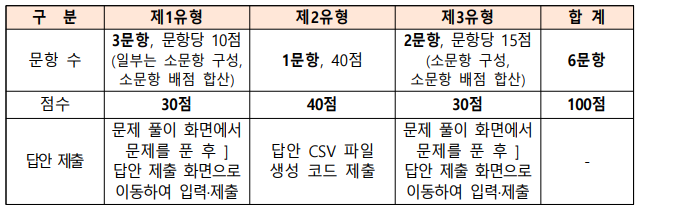

### **빅데이터 분석 기사 실기 10회 대비 예시문제 풀이**

### 작업1유형 예시문제
#### 제공 데이터 (employee_performance.csv)

회사의 직원 연봉과 근속연수 등에 관한 자료입니다.

#### 데이터 컬럼 설명:
- 직원ID: 고유 식별자  
- 부서: 소속 부서  
- 연봉: 연간 급여  
- 근속연수: 총 근무기간  
- 성과등급: 성과 등급 [A, B, C]  
- 교육참여횟수: 회사 교육에 참여한 횟수  
- 고객만족도: 담당 업무에 대한 고객의 만족도  

---

####  수행 순서

1. **고객만족도가 없는 직원**의 경우, 평균 고객만족도로 결측치를 채운다.
2. **근속연수가 없는 직원**의 경우, 해당 직원을 삭제한다.
3. 직원의 **고객만족도의 4분위 중 3사분위수 값**을 계산한다.
4. **부서별로 평균 연봉을 구하고**,  
   두 번째로 평균연봉이 높은 부서의 평균연봉을 계산한다.

---

#### 제출 항목

① 수행순서 3)에서 계산한 값을 입력하세요.  
☞ **[제출 형식]** 버림하여 정수(integer)로 작성

② 수행순서 4)에서 계산한 값을 입력하세요.  
☞ **[제출 형식]** 버림하여 정수(integer)로 작성


In [ ]:
# 데이터 이해
import pandas as pd
path = 'https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/'
df = pd.read_csv(path + 'employee_performance.csv')
print(df.shape)
df.head(3)

(1000, 7)


,직원ID,부서,연봉,근속연수,성과등급,교육참여횟수,고객만족도
0,E1,Marketing,57285,4.0,A,14,8.0
1,E2,Finance,31605,15.0,C,5,4.0
2,E3,IT,101158,10.0,A,19,4.0


In [ ]:
# 여기에 풀이해 주세요.
import pandas as pd
path = 'https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/'
df = pd.read_csv(path + 'employee_performance.csv')
# 1) 고객만족도가 없는 직원의 경우, 평균 고객만족도로 결측치를 채운다.
# 2) 근속연수가 없는 직원의 경우, 해당 직원을 삭제한다.
# 3) 직원의 고객만족도의 4분위 중 3사분위수 값을 계산한다.
# 4) 부서별로 평균 연봉을 구하고,
# 두 번째로 평균연봉이 높은 부서의 평균연봉을 계산한다.
#print(df.isna().sum())
df['고객만족도'] = df['고객만족도'].fillna(df['고객만족도'].mean())
df = df.dropna()
#df = df.dropna(subset=['근속연수'])
Q3 = df['고객만족도'].quantile(0.75)
print(int(Q3))  # 8
s = df.groupby('부서')['연봉'].mean().sort_values(ascending=False).iloc[1]
print(int(s))  # 74690

8
74690


### 작업2유형 예시문제
제공된 학습용 데이터(customer_train.csv)는 백화점 고객의 1년간 상품 구매 기록입니다.  
이 데이터를 활용하여 **총구매액**을 예측하는 모델을 학습하고,  
이를 평가용 데이터(customer_test.csv)에 적용해 **총구매액을 예측**합니다.

- 예측 성능 평가지표: **RMSE (Root Mean Squared Error)**

---

#### 제출 형식

- 파일명: `result.csv` (파일명에 디렉토리.폴더 지정불가)
- 예측 총 구매금액 칼럼명: `pred`
- 제출 칼럼 개수: pred 칼럼 1개
- 평가용 데이터 개수와 예측 결과 데이터 개수 일치 : 2,482개


#### 제공 데이터

1. **customer_train.csv**: 학습 데이터, 3,500개
2. **customer_test.csv**: 테스트 데이터, 2,482개  
   ※ 테스트 데이터에는 총구매액 칼럼 미제공


#### 데이터 설명

| 컬럼명          | 설명                                |
|------------------|--------------------------------------|
| 회원ID           | 회원 고유 번호                       |
| 총구매액         | 총 구매금액 (십만원 단위)           |
| 최대구매액       | 구매건당 최대 구매금액 (십만원 단위) |
| 환불금액         | 환불 금액 (십만원 단위)             |
| 주구매상품       | 주로 구매한 품목 (42개 범주)         |
| 주구매지점       | 주로 구매한 지정점 (24개 범주)       |
| 방문일수         | 고객이 방문한 일수 (년 단위)        |
| 방문당구매건수   | 총구매건수 / 방문일수                |
| 주말방문비율     | 주말에 방문한 비율                   |
| 구매주기         | 구매 주기 (일 단위)                  |

---
#### CSV 파일 형식 및 확인 방법

- CSV 파일명: result.csv
- 예측 총 구매금액 칼럼명: pred

| 칼럼명 | 칼럼 설명 |
|--------|------------|
| pred   | 예측 총 구매금액 |

---

#### 제출 CSV 파일 형식 예시

        pred
        8790.6061268
        14.748660
        215.6055114
        761.88
        ……
        458.1171402

In [44]:
# 여기에 문제를 풀이해 주세요.
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import mean_absolute_error as mae

def get_scores(model, x_train, x_test, y_train, y_test):
    A = model.score(x_train, y_train) #모델의 성능(정확도 또는 결정계수 등)을 평가
    B = model.score(x_test, y_test)   #(이어서)분류일때는 정확도(accuracy), 회귀일때는 결정계수(R², R-squared)를 반환
    y_pred1 = abs(model.predict(x_train))
    y_pred2 = abs(model.predict(x_test))
    C = mse(y_train, y_pred1) ** 0.5  # rmse
    D = mse(y_test, y_pred2) ** 0.5   # rmse
    return f'r2: {A:.4f}, {B:.4f} RMSE: {C:.4f}, {D:.4f}'
    #결정계수(R², 결정계수, R-squared)는 회귀 모델에서 독립 변수가 종속 변수를 얼마나 잘 설명하는지를 나타내는 지표임
    #결정계수는 0에서 1 사이의 값을 가지며, 1에 가까울수록 모델이 데이터를 잘 설명한다는 의미
    #예로 결정계수가 0.7이면 독립 변수가 종속 변수의 변동을 약 70% 설명한다고 볼 수 있음

# [1] 파일 가져오기 (2개, XX_train.csv, XX_test.csv)
XY = pd.read_csv('https://raw.githubusercontent.com/gtsu070701/bigdata_license/refs/heads/main/2type_sample_customer02_train.csv')
X_submission = pd.read_csv('https://raw.githubusercontent.com/gtsu070701/bigdata_license/refs/heads/main/2type_sample_customer02_test.csv')

# print(XY.shape, X_submission.shape) #(3500, 10) (2482, 9)
# print(XY.head())
# print(X_submission.head(3))

X = XY.drop(columns='총구매액')
Y = XY['총구매액']
#print(X.shape, Y.shape) #(3500, 9) (3500,)

# [2] 데이터 탐색 (XY.info(), X_submission.info()) 결측치, 컬럼 dtype
#XY.info()  # 환불금액 1205 non-null // 주구매상품, 주구매지점 - object
#print(XY.select_dtypes(include=['object']).nunique()) #주구매상품 42 주구매지점 24
#print(XY.nunique())

# [3] 데이터 전처리
# [3-1] X, X_submission -> X_all
# [3-2] X_all : 컬럼제거, 컬럼 dtype 변경(컬럼의 값을 대체), Encoding(범주형->수치형)
# [3-3] X_all : Scaling (안함, MinMaxScaler, StandardScaler, ...)
# [3-4] X_all -> X, X_submission 분리

X_all = pd.concat([X, X_submission])
#print(X_all.shape) #(5982, 9)

# 컬럼제거 : 회원ID
# Encoding : obj_columns -> LabelEncoding
X_all = X_all.drop(columns=['회원ID'])
X_all['환불금액'] = X_all['환불금액'].fillna(0)
X_all['주구매상품'] = LabelEncoder().fit_transform(X_all['주구매상품'])
X_all['주구매지점'] = LabelEncoder().fit_transform(X_all['주구매지점'])

# X_all = pd.get_dummies(X_all, drop_first=True, dtype='int')
#원-핫 인코딩(One-Hot Encoding)수행, drop_first=True 첫 번째 범주를 생략(다중공선성 최소화 가능)

#if True:는 항상 조건이 참(True)이므로, 항상 아래 코드가 실행
# if True:
#     temp = MinMaxScaler().fit_transform(X_all)
#     X_all = pd.DataFrame(temp, columns=X_all.columns)

# print(type(temp))  # <class 'numpy.ndarray'>
# print(type(X_all))

# X_all.info()

X = X_all.iloc[:len(X), :]
X_submission = X_all.iloc[len(X):, :]
#print(X.shape, X_submission.shape)  # (3500, 8) (2482, 8)

# [4] 모델링
# [4-1] train_test_split : (X, Y) -> (x_train, x_test, y_train, y_test)
# [4-2] 모델객체 생성, 학습 (x_train, y_train)
# [4-3] 평가 (x_train, y_train), (x_test, y_test)

temp = train_test_split(X, Y, test_size=0.2, random_state=42) #stratify =Y
x_train, x_test, y_train, y_test = temp
#print([x.shape for x in temp])  # [(2800, 9), (700, 9), (2800,), (700,)]

# model1 = LinearRegression().fit(x_train, y_train)
# print(get_scores(model1, x_train, x_test, y_train, y_test))
# r2: 0.6808, 0.6880 RMSE: 93609635.3425, 85804766.7420
# r2: 0.7056, 0.6991 RMSE: 89704111.9655, 84029470.9589 - One Hot Encoding

# model2 = DecisionTreeRegressor(random_state=123).fit(x_train, y_train)
# print(get_scores(model2, x_train, x_test, y_train, y_test))
# print(model2.get_depth())
# r2: 1.0000, 0.4253 RMSE: 2109295.5948, 116554791.0293

# for d in range(3, 15):
#     model2 = DecisionTreeRegressor(max_depth=d, random_state=123).fit(x_train, y_train)
#     print(d, get_scores(model2, x_train, x_test, y_train, y_test))
# model2 = DecisionTreeRegressor(max_depth=4, random_state=123).fit(x_train, y_train)
# print(get_scores(model2, x_train, x_test, y_train, y_test))
# 4 r2: 0.7369, 0.6744 RMSE: 85062515.5093, 87729788.2157

# model3 = RandomForestRegressor(random_state=24).fit(x_train, y_train)
# print(get_scores(model3, x_train, x_test, y_train, y_test))
# r2: 0.9661, 0.7178 RMSE: 30536350.1313, 81674977.8693 - Label
# r2: 0.9654, 0.7079 RMSE: 30863224.4117, 83097036.6871 - One Hot

# for d in range(3, 12):
#     model3 = RandomForestRegressor(max_depth=d, random_state=1234).fit(x_train, y_train)
#     print(d, get_scores(model3, x_train, x_test, y_train, y_test))
model3 = RandomForestRegressor(max_depth=6, random_state=24).fit(x_train, y_train)
print(get_scores(model3, x_train, x_test, y_train, y_test))
#  r2: 0.8738, 0.7285 RMSE: 58916941.3661, 80119612.4480 - Label
# r2: 0.8606, 0.7478 RMSE: 61174537.4671, 81312068.3553

# model4 = GradientBoostingRegressor(n_estimators=100, random_state=1234).fit(x_train, y_train)
# print(get_scores(model4, x_train, x_test, y_train, y_test))

# model5 = AdaBoostRegressor(random_state=1234).fit(x_train, y_train)
# print(get_scores(model5, x_train, x_test, y_train, y_test))

fixed_model = model3
y_pred = fixed_model.predict(X_submission)
pd.DataFrame({'pred':y_pred}).to_csv('result.csv', index=False)
temp = pd.read_csv('result.csv')
print(temp.shape)
# print(Y.describe())
# print(temp['pred'].describe())
print(temp.head(5))

r2: 0.8634, 0.7579 RMSE: 605.5474, 796.6552
(2482, 1)
          pred
0   920.974331
1  3484.480342
2  2417.354059
3    96.763153
4    17.580959


In [43]:
# 여기에 문제를 풀이해 주세요.
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse

def get_scores(model, x_train, x_test, y_train, y_test):
    A = model.score(x_train, y_train) #모델의 성능(정확도 또는 결정계수 등)을 평가
    B = model.score(x_test, y_test)   #(이어서)분류일때는 정확도(accuracy), 회귀일때는 결정계수(R², R-squared)를 반환
    y_pred1 = abs(model.predict(x_train))
    y_pred2 = abs(model.predict(x_test))
    C = mse(y_train, y_pred1) ** 0.5  # rmse
    D = mse(y_test, y_pred2) ** 0.5   # rmse
    return f'r2: {A:.4f}, {B:.4f} RMSE: {C:.4f}, {D:.4f}'

XY = pd.read_csv('https://raw.githubusercontent.com/gtsu070701/bigdata_license/refs/heads/main/2type_sample_customer02_train.csv')
X_submission = pd.read_csv('https://raw.githubusercontent.com/gtsu070701/bigdata_license/refs/heads/main/2type_sample_customer02_test.csv')

X = XY.drop(columns='총구매액')
Y = XY['총구매액']


X_all = pd.concat([X, X_submission])


X_all = X_all.drop(columns=['회원ID'])
X_all['환불금액'] = X_all['환불금액'].fillna(0)
X_all['주구매상품'] = LabelEncoder().fit_transform(X_all['주구매상품'])
X_all['주구매지점'] = LabelEncoder().fit_transform(X_all['주구매지점'])

# X_all = pd.get_dummies(X_all, drop_first=True, dtype='int')

X = X_all.iloc[:len(X), :]
X_submission = X_all.iloc[len(X):, :]


temp = train_test_split(X, Y, test_size=0.2, random_state=42) #stratify =Y
x_train, x_test, y_train, y_test = temp

model3 = RandomForestRegressor(max_depth=6, random_state=24).fit(x_train, y_train)
print(get_scores(model3, x_train, x_test, y_train, y_test))

fixed_model = model3
y_pred = fixed_model.predict(X_submission)
pd.DataFrame({'pred':y_pred}).to_csv('result.csv', index=False)
temp = pd.read_csv('result.csv')
print(temp.shape)
print(temp.head(5))

r2: 0.8634, 0.7579 RMSE: 605.5474, 796.6552
(2482, 1)
          pred
0   920.974331
1  3484.480342
2  2417.354059
3    96.763153
4    17.580959
